## Healthcare Analytics

In [1]:
#Importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt

In [2]:
#reading train and test data
train_data = pd.read_csv('G:/analytics vidhya/heathcare analytics/train_ajEneEa.csv')
test_data = pd.read_csv('G:/analytics vidhya/heathcare analytics/test_v2akXPA.csv')

#merging data
dataset = pd.concat([train_data,test_data],ignore_index = True, sort = True)
dataset.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,stroke,work_type
0,Rural,3.0,95.12,18.0,No,Male,0,0,30669,NaN,0.0,children
1,Urban,58.0,87.96,39.2,Yes,Male,0,1,30468,never smoked,0.0,Private
2,Urban,8.0,110.89,17.6,No,Female,0,0,16523,NaN,0.0,Private
3,Rural,70.0,69.04,35.9,Yes,Female,0,0,56543,formerly smoked,0.0,Private
4,Rural,14.0,161.28,19.1,No,Male,0,0,46136,NaN,0.0,Never_worked


### Data Exploration

In [3]:
#checking for class imbalanced
train_data['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

Only around 1.8% of the total training data belongs to label 1.
This is class imbalanced data and we can use different techniques to deal with this.

In [4]:
#categorical variables
categorical_variables = dataset.dtypes.loc[dataset.dtypes== 'object'].index
categorical_variables

Index(['Residence_type', 'ever_married', 'gender', 'smoking_status',
       'work_type'],
      dtype='object')

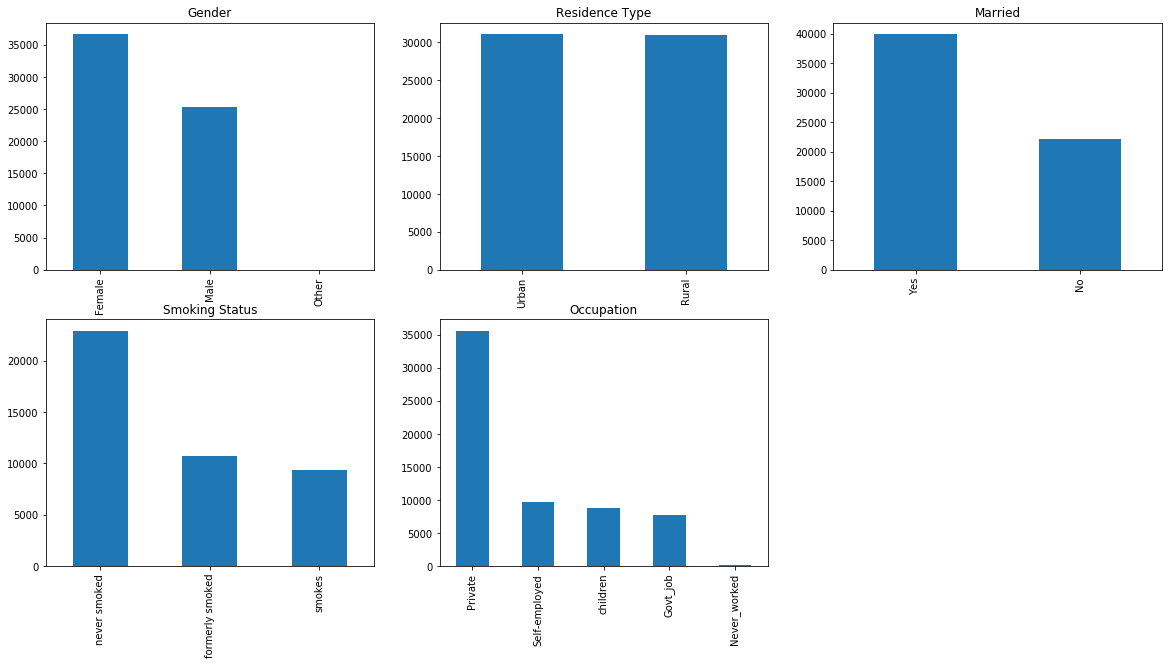

In [5]:
#Univariate analysis
plt.figure(figsize = (20,10))
#plt.subplots_adjusts(hspace = 0,vspace = 0)
plt.subplot(2,3,1)
plt.title('Gender')
dataset['gender'].value_counts().plot.bar()

plt.subplot(2,3,2)
plt.title('Residence Type')
dataset['Residence_type'].value_counts().plot.bar()

plt.subplot(2,3,3)
plt.title('Married')
dataset['ever_married'].value_counts().plot.bar()

plt.subplot(2,3,4)
plt.title('Smoking Status')
dataset['smoking_status'].value_counts().plot.bar()

plt.subplot(2,3,5)
plt.title('Occupation')
dataset['work_type'].value_counts().plot.bar()

In [7]:
#continuous variable
summary = dataset.describe()
summary

,age,avg_glucose_level,bmi,heart_disease,hypertension,id,stroke
count,62001.000000,62001.000000,59948.000000,62001.000000,62001.000000,62001.000000,43400.000000
mean,42.169475,104.453832,28.587099,0.047677,0.093450,36452.514814,0.018041
std,22.522100,42.960537,7.766122,0.213083,0.291065,21067.155945,0.133103
min,0.080000,55.000000,10.100000,0.000000,0.000000,1.000000,0.000000
25%,24.000000,77.540000,23.200000,0.000000,0.000000,18187.000000,0.000000
50%,44.000000,91.660000,27.700000,0.000000,0.000000,36463.000000,0.000000
75%,60.000000,112.120000,32.800000,0.000000,0.000000,54693.000000,0.000000
max,82.000000,291.050000,97.600000,1.000000,1.000000,72943.000000,1.000000


In [8]:
# checking null values 
dataset.apply(lambda x: sum(x.isnull()))

Residence_type           0
age                      0
avg_glucose_level        0
bmi                   2053
ever_married             0
gender                   0
heart_disease            0
hypertension             0
id                       0
smoking_status       19043
stroke               18601
work_type                0
dtype: int64

In [9]:
# bivariate analysis
cross_tab1 = pd.crosstab(dataset['work_type'],dataset['smoking_status'],margins = True)
cross_tab1

smoking_status,formerly smoked,never smoked,smokes,All
work_type,,,,
Govt_job,1546,3238,1397,6181
Never_worked,15,117,10,142
Private,6697,14983,6386,28066
Self-employed,2358,3846,1508,7712
children,137,702,18,857
All,10753,22886,9319,42958


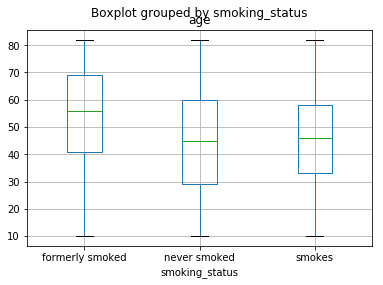

In [10]:
dataset.boxplot(column = 'age',by = 'smoking_status')

Age does not give clear indication about the smoking status of patient. But in case of formerly smoked status we can have small interpretation that mean age of patients who 'formerly smoked'  is around 55.

### Null value imputation

Null value in smoking status are imputed as below.
Patient having age greater than or equal to 55, is assigned 'formerly smoked'.
Patient having age below 30 and work type as children are more likely to have never smoked.
Remaining null values are also assigned with 'never smoked' as majority of patient belong to this category.

In [11]:
Rows_NanWeight = dataset[dataset['smoking_status'].isnull()]

dataset.loc[(dataset['smoking_status'].isnull()) & (dataset.work_type == 'children'), 'smoking_status']='never smoked'
dataset.loc[(dataset['smoking_status'].isnull()) & (dataset.age<=30), 'smoking_status']='never smoked'
dataset.loc[(dataset['smoking_status'].isnull()) & (dataset.age >= 55), 'smoking_status']='formerly smoked'

dataset.loc[dataset['smoking_status'].isnull(),'smoking_status'] = 'never smoked'

BMI values can somehow be related with age.
Scatter plot shows some approximate trend line can be fitted to this. So, the age values are binned in age groups of 10 and then the mean bmi value for that age group is used to replace NaN values in that particular age group.

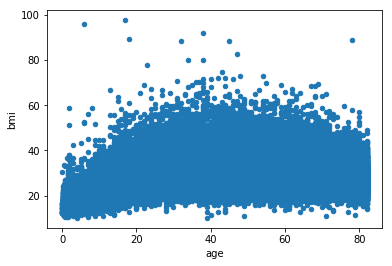

In [12]:
dataset.plot('age','bmi',kind = 'scatter')

In [14]:
NoNan_bmi = dataset[dataset['bmi'].notnull()]

Mean_bmi = pd.DataFrame()
Mean_bmi = NoNan_bmi[['age','bmi']]

#biining age intpo 10 age group with mean of bmi 
bins = np.linspace(0, 90, 10)
groups = Mean_bmi.groupby(pd.cut(Mean_bmi.age, bins))
print(groups.mean().bmi)

dataset.loc[(dataset['bmi'].isnull()) & (dataset.age <= 10), 'bmi']= 18.853
dataset.loc[(dataset['bmi'].isnull()) & ((dataset.age >= 10) & (dataset.age <20)), 'bmi']= 25.006
dataset.loc[(dataset['bmi'].isnull()) & ((dataset.age >=20 ) & (dataset.age <30)), 'bmi']= 28.700
dataset.loc[(dataset['bmi'].isnull()) & ((dataset.age >= 30) & (dataset.age <70)), 'bmi']= 31.250
dataset.loc[(dataset['bmi'].isnull()) & ((dataset.age >= 70) & (dataset.age <=90)), 'bmi']= 29.096

age
(0.0, 10.0]     18.853496
(10.0, 20.0]    25.013064
(20.0, 30.0]    28.700140
(30.0, 40.0]    30.732165
(40.0, 50.0]    31.146429
(50.0, 60.0]    31.404439
(60.0, 70.0]    31.162145
(70.0, 80.0]    29.096731
(80.0, 90.0]    27.672250
Name: bmi, dtype: float64


In [15]:
#again checking for null values
dataset.apply(lambda x: sum(x.isnull()))

Residence_type           0
age                      0
avg_glucose_level        0
bmi                      0
ever_married             0
gender                   0
heart_disease            0
hypertension             0
id                       0
smoking_status           0
stroke               18601
work_type                0
dtype: int64

### Feature Engineering

In feature engineering, the features are transformed such that transformed feature values explaines the output more clearly.

In [16]:
#specific age doesnt impact the likelihood of stroke but binning them can do it.
#labels = ['0-18','18-40','40-65','above 65']
dataset['age_group'] = pd.cut(dataset['age'], [0, 18, 40,65,85],labels = ['0-18','19-40','41-65','66-85'])
#encoding them as integer values
dataset['age_group']  = dataset['age_group'].map({'0-18': 0, '19-40': 1,'41-65':2,'66-85':3})
dataset[['age_group','age']].head()

,age_group,age
0,0,3.0
1,2,58.0
2,0,8.0
3,3,70.0
4,0,14.0


BMI values are grouped and transformed into categories as 
0-19 'UnderWeight',
19-25 'HealthyWeight',
25-30  'OverWeight',
above 30 'Obese'.

In [17]:
#bmi values
dataset['bmi'] = pd.cut(dataset['bmi'],[0,19,25,30,100],right = False,labels =[ 'UnderWeight','HealthyWeight',
                                                                                'OverWeight','Obese'])
dataset['bmi']  = dataset['bmi'].map({'Obese':3,'OverWeight': 2, 'HealthyWeight': 1,'UnderWeight':0})

In [18]:
# Avg_glucose level
dataset['avg_glucose_level'] = pd.cut(dataset['avg_glucose_level'],[0,140,200,300],labels =[ 'Normal','PreDiabetic',
                                                                                'Diabetic'])
dataset['avg_glucose_level'] = dataset['avg_glucose_level'].map({'Normal':0,'PreDiabetic':1,'Diabetic':2})
dataset['avg_glucose_level'].head()

0    0
1    0
2    0
3    0
4    1
Name: avg_glucose_level, dtype: int64

In [19]:
#gender
dataset.loc[dataset['gender']== 'Other','gender'] = 'Female'
dataset['gender'] = dataset['gender'].map({'Female':0,'Male':1})

In [20]:
#dropping unnecessary columns
dataset.drop(['age','id','stroke'],inplace = True,axis =1)

In [21]:
#encoding remaining categorical variables
dataset = pd.get_dummies(dataset)

#separating training and test set
X = dataset.iloc[:43400,:].values
test_data = dataset.iloc[43400:,:].values
y = train_data.iloc[:43400,11].values

### Model Building

In [22]:
# fitting LogisticRegression and checking for optimal parameters using GridSearch CV
# this was a class imbalanced data, so here while using Logistic Regression model we are using 'class_weight' parameter
#and assigning to 'balanced' that will take care of class imbalance.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'C':[0.01,0.05,0.25,0.5,1]
}
gsearch1 = GridSearchCV(estimator = LogisticRegression(class_weight = 'balanced'),param_grid = param_test1,scoring = 'roc_auc',
                        n_jobs=-1,iid=False, cv=5)
gsearch1.fit(X,y)
gsearch1.best_params_, gsearch1.best_score_

C:\Users\prashant bajetha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


({'C': 1}, 0.8416538651785583)

In [23]:
#fitting model with optimal hyperparameters
opt_logreg = LogisticRegression(C=1,class_weight = 'balanced')
opt_logreg.fit(X,y)

C:\Users\prashant bajetha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred = opt_logreg.predict(test_data)
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

Here,the Logistic Regression model gives cross validation score of 0.84 and final test score of 0.77.
I have earlier tried with same model but due to lack of feature engineering, the test score i could get was around 0.55 and with different models i was able to improve my test score only to 0.68.

The roc auc score for this was 0.77